In [1]:
from string import Template
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timezone
import datetime
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib.animation import FuncAnimation

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/KHDL

/content/drive/MyDrive/KHDL


# **Part 1: Getting Bitcoin Price Hourly**

**Declare Variables**

In [42]:
# format: Local time: yyyy-mm-dd hh:mm:ss
# Default: 2021-01-01 00:00:00 -> utcnow
datetimeBegin = '2021-01-01 00:00:00'
datetimeEnd = datetime.datetime.utcnow()

listCoinID = {'Bitcoin': 1, 'Ethereum': 1027, 'BinanceCoin': 1839, 'Maker': 1518, 'Litecoin': 2}

**Define Functions**

In [38]:
# Get localtime from timestamp
def getLocalTimeFromTimestamp(timestamp):
    return datetime.datetime.fromtimestamp(timestamp + 7*3600)


def getUTCTimeFromTimestamp(timestamp):
    return datetime.datetime.fromtimestamp(timestamp)


# Change format localtime
def changeFormatLocaltime(localtime):
    return datetime.datetime.strftime(localtime, '%d %b %Y, %H:%M')

# Get UCT timestamp from localtime
def getUTCTimestampFromTime(localDatetime):
    try:
        localDatetime = datetime.datetime.strptime(localDatetime, '%Y-%m-%d %H:%M:%S')
        return int(localDatetime.replace(tzinfo=timezone.utc).timestamp())
    except:
        return int(localDatetime.replace(tzinfo=timezone.utc).timestamp())

# Get Coin Price Hourly
def getCoinPriceHourly(coinName, datetimeBegin=datetimeBegin, datetimeEnd=datetime.datetime.utcnow(), numOfSamples=1000):
    # Get Coin ID -> if not exist, return Error Message
    try:
      coinID = listCoinID[coinName]
    except:
      return 'Coin is not exist!'
    
    # Get Timestamp from UTCTime
    timestampBegin = str(getUTCTimestampFromTime(datetimeBegin))
    timestampEnd = str(getUTCTimestampFromTime(datetimeEnd))

    # Get URL Coin price hourly
    website = Template(
        'https://web-api.coinmarketcap.com/v1.1/cryptocurrency/quotes/historical?convert=USD,BTC&format=chart_crypto_details&id=$coinID&interval=1h&time_end=$timestampEnd&time_start=$timestampBegin')
    url_API = website.substitute(coinID=coinID, timestampBegin=timestampBegin,
                                 timestampEnd=timestampEnd)

    # Create DataFrame to save Data
    details = ['Timestamp', 'Localtime', 'Price', 'Volume1h', 'MarketCap']
    df = pd.DataFrame(columns=details)

    # Get Data from URL
    json = requests.get(url_API).json()['data']
    numOfCrawledData = len(json)
    sample = 0
    keys = list(json.keys())[-numOfSamples:]
    while sample < numOfSamples and sample < numOfCrawledData:
        utc = keys[sample]
        utc = utc.replace('T', ' ')
        utc = utc.replace('.000Z', '')
        timestamp = getUTCTimestampFromTime(utc)
        df = df.append({df.columns[0]: timestamp,
                        df.columns[1]: getLocalTimeFromTimestamp(timestamp),
                        df.columns[2]: json[keys[sample]]['USD'][0],
                        df.columns[3]: json[keys[sample]]['USD'][1],
                        df.columns[4]: json[keys[sample]]['USD'][2]},
                       ignore_index=True)
        sample += 1
    return df

**Get Bitcoin Price Hourly and Save as .csv file**

In [112]:
csvBitcoin = './BitcoinPriceHourly.csv'
csvEthereum = './EthereumPriceHourly.csv'
csvBinanceCoin = './BinanceCoinPriceHourly.csv'
csvMaker = './MakerPriceHourly.csv'
csvLitecoin = './LitecoinPriceHourly.csv'

numOfSamples = 1000

dfBitcoin = getCoinPriceHourly('Bitcoin', datetimeEnd=datetime.datetime.utcnow(), numOfSamples=numOfSamples)
dfBitcoin.to_csv(csvBitcoin, index=False)
dfEthereum = getCoinPriceHourly('Ethereum', datetimeEnd=datetime.datetime.utcnow(), numOfSamples=numOfSamples)
dfEthereum.to_csv(csvEthereum, index=False)
dfBinanceCoin = getCoinPriceHourly('BinanceCoin', datetimeEnd=datetime.datetime.utcnow(), numOfSamples=numOfSamples)
dfBinanceCoin.to_csv(csvBinanceCoin, index=False)
dfMaker = getCoinPriceHourly('Maker', datetimeEnd=datetime.datetime.utcnow(), numOfSamples=numOfSamples)
dfMaker.to_csv(csvMaker, index=False)
dfLitecoin = getCoinPriceHourly('Litecoin', datetimeEnd=datetime.datetime.utcnow(), numOfSamples=numOfSamples)
dfLitecoin.to_csv(csvLitecoin, index=False)

In [ ]:
dfEthereum

**Plot Data**

In [79]:
def plotData(df, column = 'Price'):
  plt.style.use('seaborn')
  plt.figure(figsize=(18, 10))
  plt.subplot(221)
  plt.plot(df['Localtime'], df['Price'])
  plt.title('Price Hourly (USD)')
  plt.xlabel('Time')
  plt.ylabel('Price (USD)')
  plt.subplot(222)
  plt.plot(df['Localtime'], df['Volume1h'])
  plt.title('Volume1h Hourly (USD)')
  plt.xlabel('Time')
  plt.ylabel('Volume1h (USD)')
  plt.subplot(223)
  plt.plot(df['Localtime'], df['MarketCap'])
  plt.title('MarketCap Hourly')
  plt.xlabel('Time')
  plt.ylabel('MarketCap (USD)')
  plt.show()

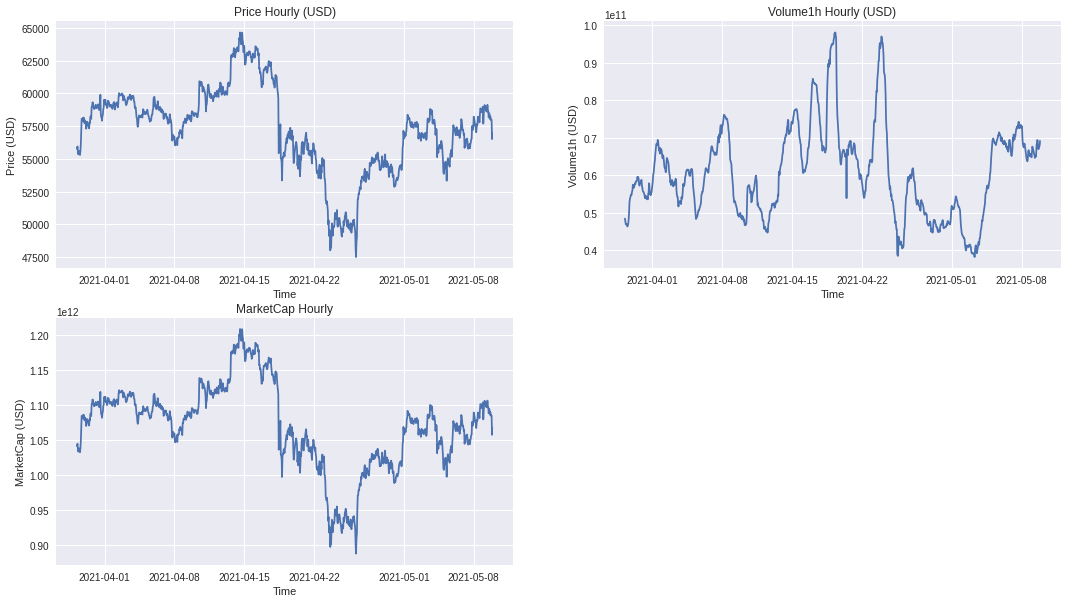

In [80]:
plotData(dfBitcoin)

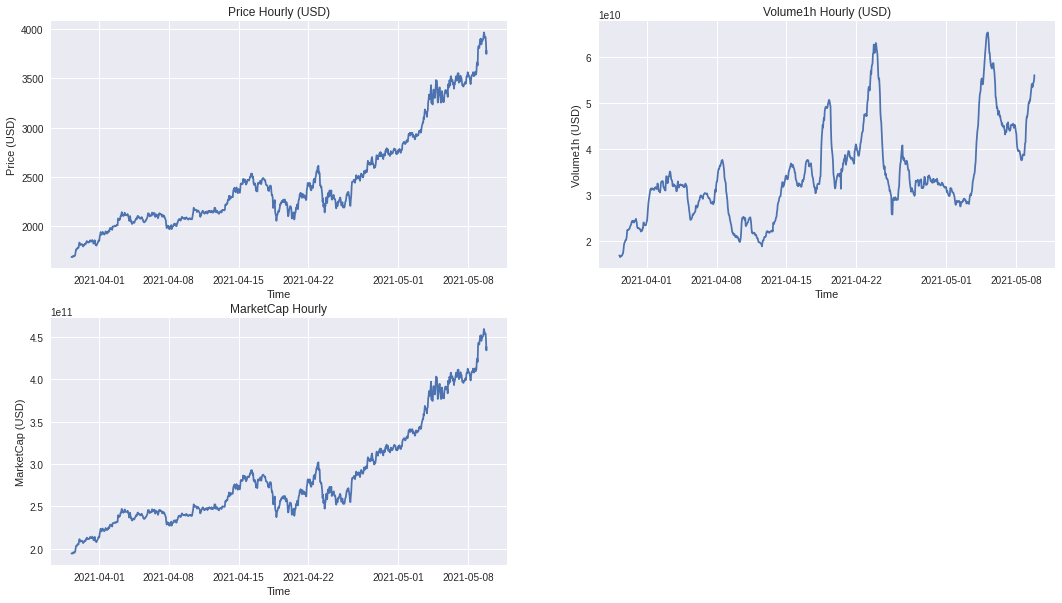

In [81]:
plotData(dfEthereum)

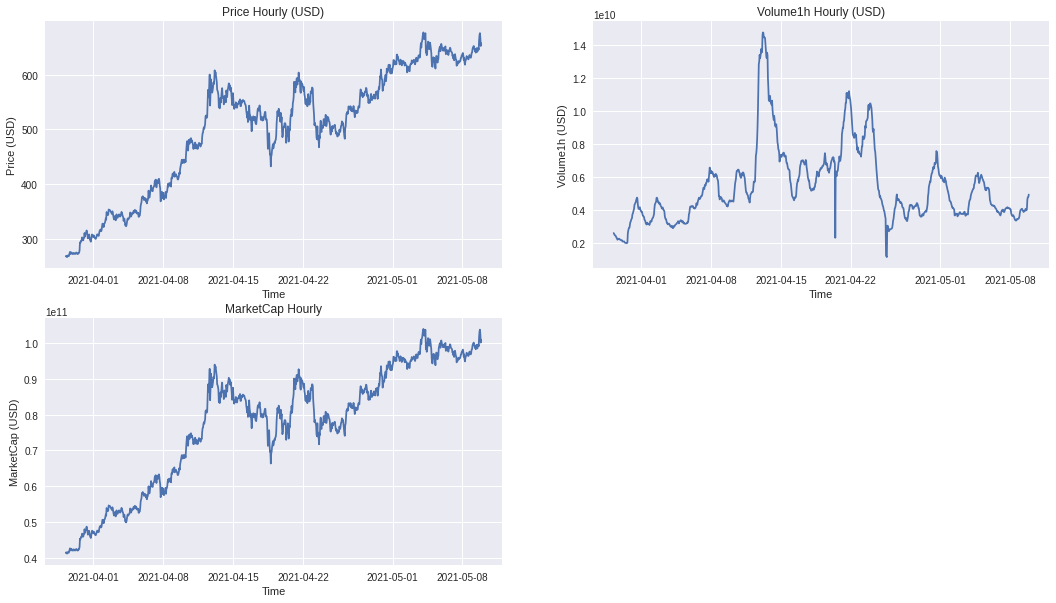

In [82]:
plotData(dfBinanceCoin)

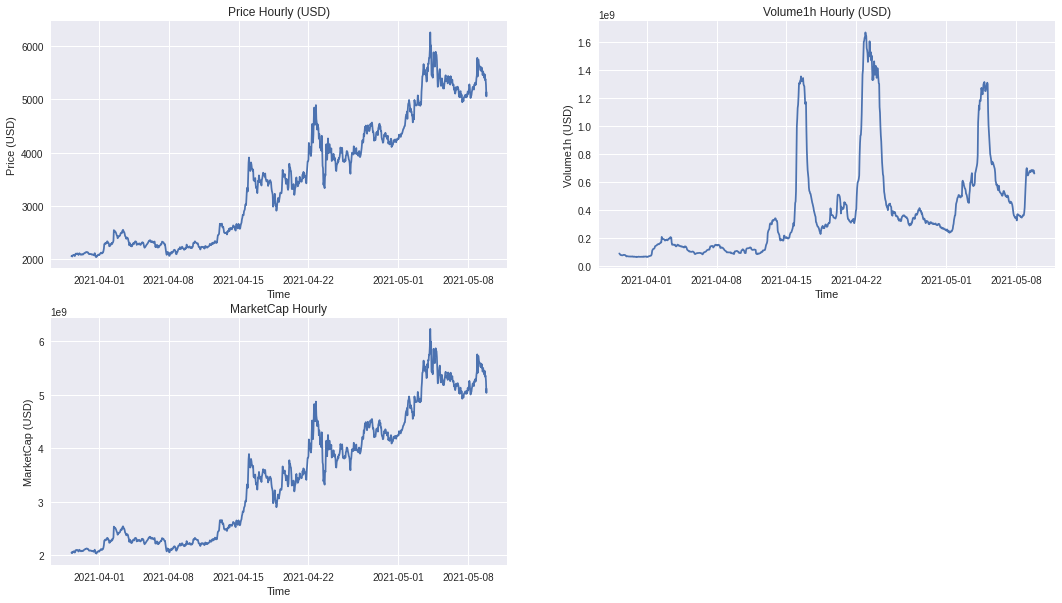

In [83]:
plotData(dfMaker)

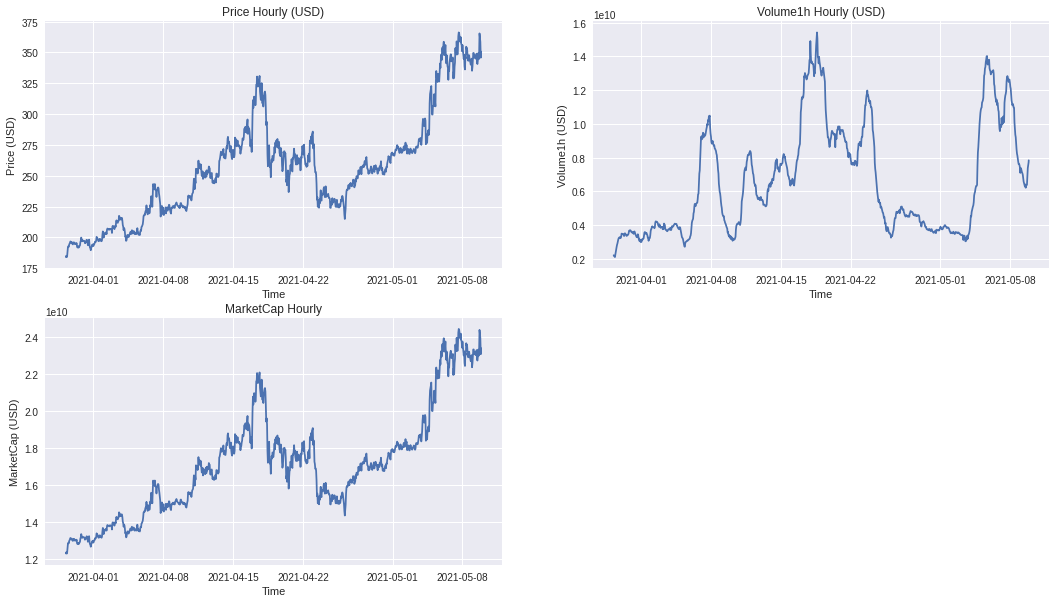

In [84]:
plotData(dfLitecoin)

In [85]:
dfBitcoin.describe()

,Price,Volume1h,MarketCap
count,1000.000000,1.000000e+03,1.000000e+03
mean,57264.015188,6.064187e+10,1.069996e+12
std,3272.754726,1.208685e+10,6.093197e+10
min,47499.307408,3.817741e+10,8.878223e+11
25%,55325.791336,5.165356e+10,1.033867e+12
50%,57737.390180,5.983022e+10,1.078702e+12
75%,59169.008968,6.791160e+10,1.105315e+12
max,64662.734192,9.810914e+10,1.208038e+12


# **Part 2: Preprocessing Data**

In [14]:
dfBitcoin.isnull().sum()

Timestamp    0
Localtime    0
Price        0
Volume1h     0
MarketCap    0
dtype: int64

**Declare Input & Output**

In [114]:
Bitcoin_X = np.asarray(dfBitcoin[['Volume1h', 'MarketCap']])
Bitcoin_Y = np.asarray(dfBitcoin['Price'])

Ethereum_X = np.asarray(dfEthereum[['Volume1h', 'MarketCap']])
Ethereum_Y = np.asarray(dfEthereum['Price'])

BinanceCoin_X = np.asarray(dfBinanceCoin[['Volume1h', 'MarketCap']])
BinanceCoin_Y = np.asarray(dfBinanceCoin['Price'])

Maker_X = np.asarray(dfMaker[['Volume1h', 'MarketCap']])
Maker_Y = np.asarray(dfMaker['Price'])

Litecoin_X = np.asarray(dfLitecoin[['Volume1h', 'MarketCap']])
Litecoin_Y = np.asarray(dfLitecoin['Price'])

**Data Normalization**

In [115]:
def normalize(data):
    try:
        columnCount = len(data[0])
        for column in range(columnCount):
            data[:, column] = (data[:, column] - np.min(data[:, column]))/(np.max(data[:, column]) - np.min(data[:, column]))
        return data
    except:
        data = (data - np.min(data))/(np.max(data) - np.min(data))
        return data

n = numOfSamples

Bitcoin_X = normalize(Bitcoin_X)
Bitcoin_Y = (normalize(Bitcoin_Y)).reshape(len(Bitcoin_Y), 1)
Bitcoin = np.c_[np.ones((n, 1)), Bitcoin_X]

Ethereum_X = normalize(Ethereum_X)
Ethereum_Y = (normalize(Ethereum_Y)).reshape(len(Ethereum_Y), 1)
Ethereum = np.c_[np.ones((n, 1)), Ethereum_X]

BinanceCoin_X = normalize(BinanceCoin_X)
BinanceCoin_Y = (normalize(BinanceCoin_Y)).reshape(len(BinanceCoin_Y), 1)
BinanceCoin = np.c_[np.ones((n, 1)), BinanceCoin_X]

Maker_X = normalize(Maker_X)
Maker_Y = (normalize(Maker_Y)).reshape(len(Maker_Y), 1)
Maker = np.c_[np.ones((n, 1)), Maker_X]

Litecoin_X = normalize(Litecoin_X)
Litecoin_Y = (normalize(Litecoin_Y)).reshape(len(Litecoin_Y), 1)
Litecoin = np.c_[np.ones((n, 1)), Litecoin_X]

In [125]:
Bitcoin.shape

(1000, 3)

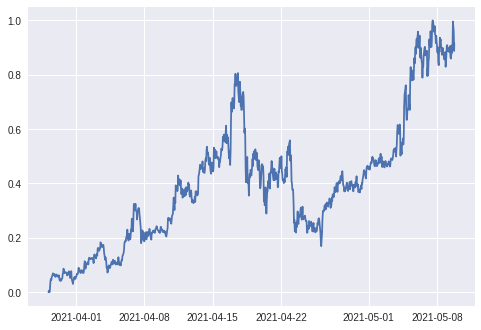

In [111]:
plt.plot(df['Localtime'], Litecoin_Y)
plt.show()

# **Part 3: Machine Learning**

**Linear Regression**

In [153]:
def batch_gradient_descent(x, y, learning_rate = 0.01, n_iterations = 2000):
    # khởi tạo giá trị tham số
    n = len(x)
    thetas = np.random.randn(len(x[0]), 1)
    thetas_path = [thetas]
    losses = []
    for i in range(n_iterations):
        # tính output
        output = x.dot(thetas)

        # tính loss
        loss = (output - y)**2  

        # tính đạo hàm cho loss
        loss_grd = 2*(output - y)/n

        # tính đạo hàm cho các tham số
        gradients = x.T.dot(loss_grd)

        # cập nhật tham số
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss)/n
        losses.append(mean_loss)
    return thetas_path, losses

bgd_thetas_BTC, losses_BTC = batch_gradient_descent(Bitcoin, Bitcoin_Y)
bgd_thetas_ETH, losses_ETH = batch_gradient_descent(Ethereum, Ethereum_Y)
bgd_thetas_BNB, losses_BNB = batch_gradient_descent(BinanceCoin, BinanceCoin_Y)
bgd_thetas_MKR, losses_MKR = batch_gradient_descent(Maker, Maker_Y)
bgd_thetas_LTC, losses_LTC = batch_gradient_descent(Litecoin, Litecoin_Y)

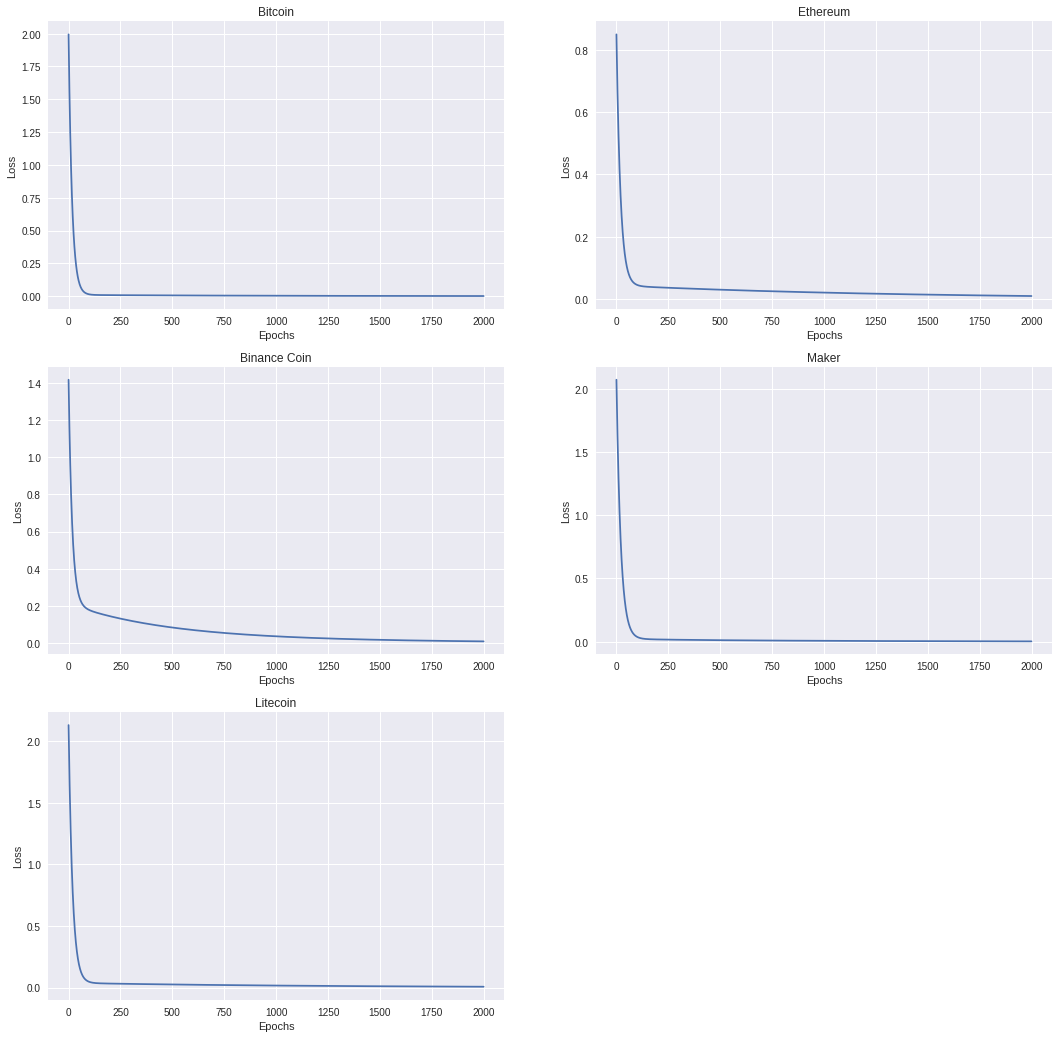

In [154]:
plt.figure(figsize = (18, 18))
plt.subplot(321)
plt.plot(range(len(losses_BTC)), losses_BTC)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Bitcoin')
plt.subplot(322)
plt.plot(range(len(losses_ETH)), losses_ETH)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Ethereum')
plt.subplot(323)
plt.plot(range(len(losses_BNB)), losses_BNB)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Binance Coin')
plt.subplot(324)
plt.plot(range(len(losses_MKR)), losses_MKR)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Maker')
plt.subplot(325)
plt.plot(range(len(losses_LTC)), losses_LTC)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Litecoin')
plt.show()

In [155]:
Bitcoin_Pred = Bitcoin_X.dot(bgd_thetas_BTC[-1][1:]) + bgd_thetas_BTC[-1][0]
Ethereum_Pred = Ethereum_X.dot(bgd_thetas_ETH[-1][1:]) + bgd_thetas_ETH[-1][0]
BinanceCoin_Pred = BinanceCoin_X.dot(bgd_thetas_BNB[-1][1:]) + bgd_thetas_BNB[-1][0]
Maker_Pred = Maker_X.dot(bgd_thetas_MKR[-1][1:]) + bgd_thetas_MKR[-1][0]
Litecoin_Pred = Litecoin_X.dot(bgd_thetas_LTC[-1][1:]) + bgd_thetas_LTC[-1][0]

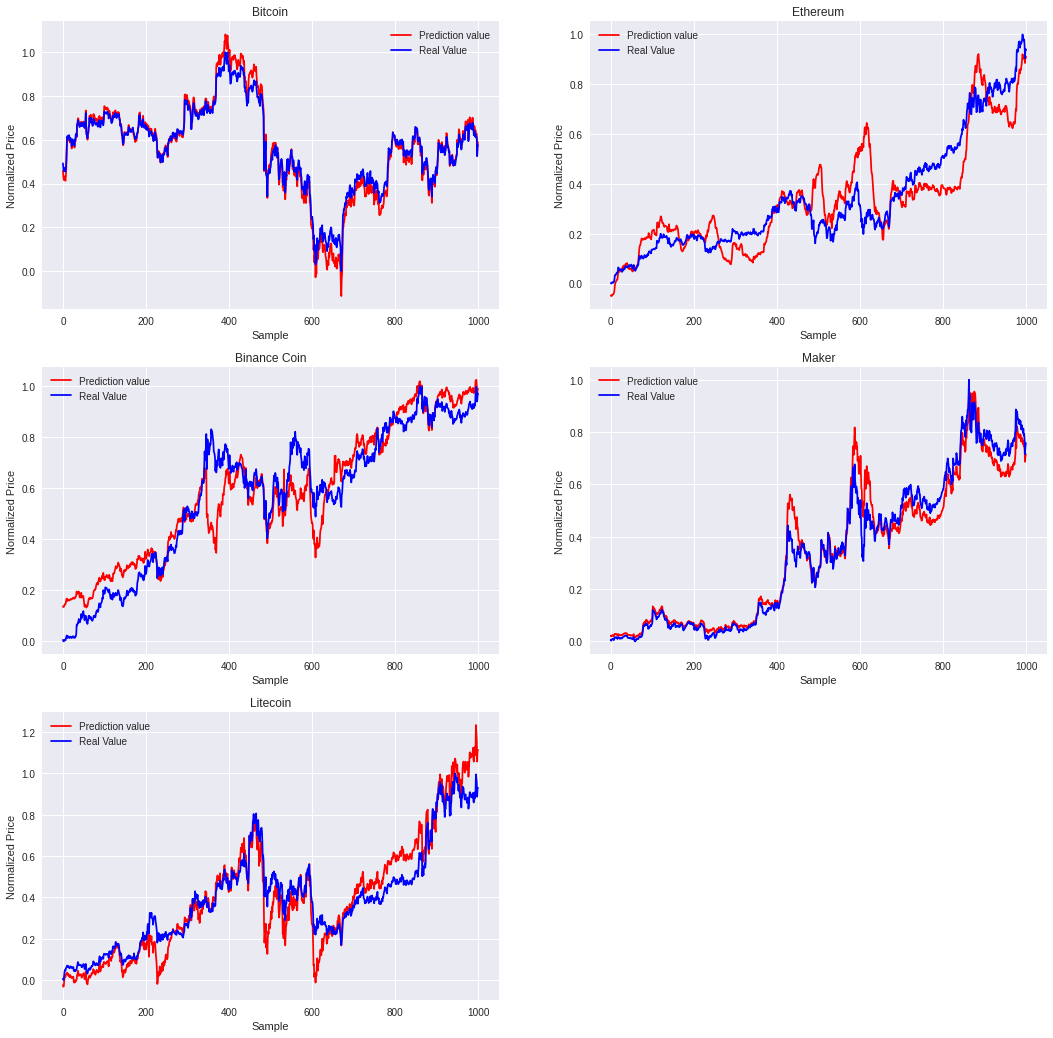

In [156]:
plt.figure(figsize = (18, 18))
plt.subplot(321)
plt.plot(range(len(Bitcoin_Pred)), Bitcoin_Pred, 'r')
plt.plot(range(len(Bitcoin_Y)), Bitcoin_Y, 'b')
plt.legend(['Prediction value', 'Real Value'])
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Bitcoin')
plt.subplot(322)
plt.plot(range(len(Ethereum_Pred)), Ethereum_Pred, 'r')
plt.plot(range(len(Ethereum_Y)), Ethereum_Y, 'b')
plt.legend(['Prediction value', 'Real Value'])
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Ethereum')
plt.subplot(323)
plt.plot(range(len(BinanceCoin_Pred)), BinanceCoin_Pred, 'r')
plt.plot(range(len(BinanceCoin_Y)), BinanceCoin_Y, 'b')
plt.legend(['Prediction value', 'Real Value'])
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Binance Coin')
plt.subplot(324)
plt.plot(range(len(Maker_Pred)), Maker_Pred, 'r')
plt.plot(range(len(Maker_Y)), Maker_Y, 'b')
plt.legend(['Prediction value', 'Real Value'])
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Maker')
plt.subplot(325)
plt.plot(range(len(Litecoin_Pred)), Litecoin_Pred, 'r')
plt.plot(range(len(Litecoin_Y)), Litecoin_Y, 'b')
plt.legend(['Prediction value', 'Real Value'])
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Litecoin')
plt.show()

**Random Forest**

In [171]:
from sklearn.model_selection import train_test_split
BTC_xtrain, BTC_xtest, BTC_ytrain, BTC_ytest = train_test_split(Bitcoin_X, Bitcoin_Y, test_size=0.3)
ETH_xtrain, ETH_xtest, ETH_ytrain, ETH_ytest = train_test_split(Ethereum_X, Ethereum_Y, test_size=0.3)
BNB_xtrain, BNB_xtest, BNB_ytrain, BNB_ytest = train_test_split(BinanceCoin_X, BinanceCoin_Y, test_size=0.3)
MKR_xtrain, MKR_xtest, MKR_ytrain, MKR_ytest = train_test_split(Maker_X, Maker_Y, test_size=0.3)
LTC_xtrain, LTC_xtest, LTC_ytrain, LTC_ytest = train_test_split(Litecoin_X, Litecoin_Y, test_size=0.3)

In [173]:
from sklearn.ensemble import RandomForestRegressor

def RandomForest(xtrain, ytrain, xtest, ytest):
    reg = RandomForestRegressor(n_estimators=200)
    reg.fit(xtrain, ytrain)
    accuracy = reg.score(xtest, ytest)
    accuracy = accuracy*100
    accuracy = float("{0:.4f}".format(accuracy))
    print('Accuracy is: ',accuracy,'%')
    return reg, accuracy

In [174]:
RF_BTC, acc_BTC = RandomForest(BTC_xtrain, BTC_ytrain, BTC_xtest, BTC_ytest)
RF_ETH, acc_ETH = RandomForest(ETH_xtrain, ETH_ytrain, ETH_xtest, ETH_ytest)
RF_BNB, acc_BNB = RandomForest(BNB_xtrain, BNB_ytrain, BNB_xtest, BNB_ytest)
RF_MKR, acc_MKR = RandomForest(MKR_xtrain, MKR_ytrain, MKR_xtest, MKR_ytest)
RF_LTC, acc_LTC = RandomForest(LTC_xtrain, LTC_ytrain, LTC_xtest, LTC_ytest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy is:  99.9846 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy is:  99.9955 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy is:  99.9837 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy is:  99.964 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy is:  99.997 %


In [176]:
forecast_BTC = RF_BTC.predict(Bitcoin_X)
forecast_ETH = RF_ETH.predict(Ethereum_X)
forecast_BNB = RF_BNB.predict(BinanceCoin_X)
forecast_MKR = RF_MKR.predict(Maker_X)
forecast_LTC = RF_LTC.predict(Litecoin_X)

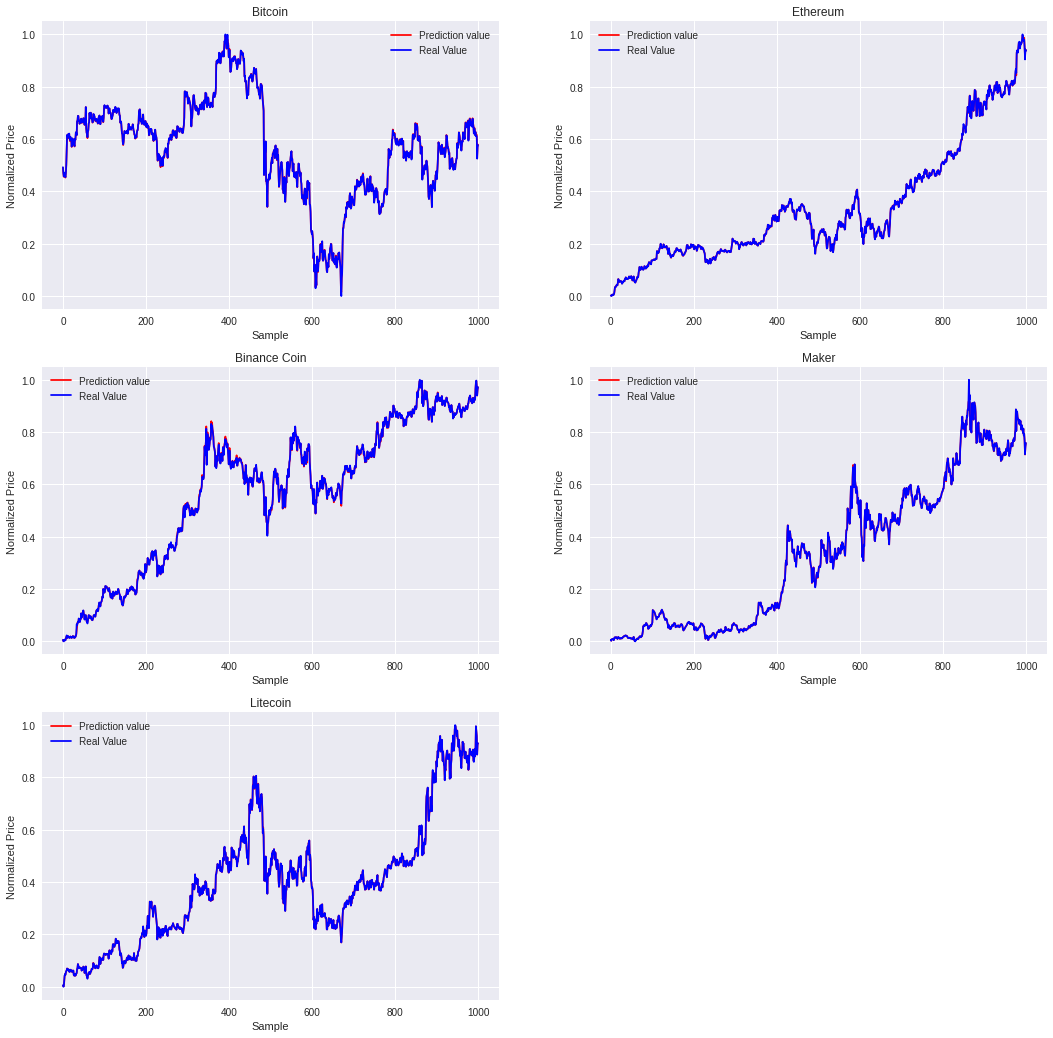

In [177]:
plt.figure(figsize = (18, 18))
plt.subplot(321)
plt.plot(range(len(forecast_BTC)), forecast_BTC, 'r')
plt.plot(range(len(Bitcoin_Y)), Bitcoin_Y, 'b')
plt.legend(['Prediction value', 'Real Value'])
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Bitcoin')
plt.subplot(322)
plt.plot(range(len(forecast_ETH)), forecast_ETH, 'r')
plt.plot(range(len(Ethereum_Y)), Ethereum_Y, 'b')
plt.legend(['Prediction value', 'Real Value'])
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Ethereum')
plt.subplot(323)
plt.plot(range(len(forecast_BNB)), forecast_BNB, 'r')
plt.plot(range(len(BinanceCoin_Y)), BinanceCoin_Y, 'b')
plt.legend(['Prediction value', 'Real Value'])
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Binance Coin')
plt.subplot(324)
plt.plot(range(len(forecast_MKR)), forecast_MKR, 'r')
plt.plot(range(len(Maker_Y)), Maker_Y, 'b')
plt.legend(['Prediction value', 'Real Value'])
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Maker')
plt.subplot(325)
plt.plot(range(len(forecast_LTC)), forecast_LTC, 'r')
plt.plot(range(len(Litecoin_Y)), Litecoin_Y, 'b')
plt.legend(['Prediction value', 'Real Value'])
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Litecoin')
plt.show()